# Guided Capstone Step 4 - Pre-processing and Training Data Development

### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   **Pre-processing and Training Data Development**

5.  Modeling
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In this step of the guided capstone, you'll revisit some of the steps you completed to solve questions in step 4. Revisiting these steps will help you get additional practice completing this kind of work.

**<font color='teal'> Start by loading the necessary packages, as you've done in the previous steps. Print out your current working directory to confirm that you are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\ajdou\\Desktop\\Springboard\\assignments\\guided capstone'

**<font color='teal'>  Load the csv file you created in step 3. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [3]:
df = pd.read_csv('C:\\Users\\ajdou\\Desktop\\Springboard\\assignments\\guided capstone\\data\\step3_output.csv', index_col=0)
df

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,cluster
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.000000,60.0,669.000000,65.000000,85.00000,150.000000,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.000000,44.0,350.000000,47.000000,53.00000,90.000000,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.000000,36.0,69.000000,30.000000,34.00000,152.000000,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.000000,81.0,260.000000,89.000000,89.00000,122.000000,0.0,2
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.000000,49.0,250.000000,74.000000,78.00000,104.000000,80.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,9500,1000,0,0.0,0,0,0,1,...,300.0,0.0,115.103943,9.0,185.316456,57.916957,64.16681,120.053004,0.0,0
326,Sleeping Giant Ski Resort,Wyoming,7428,810,0,0.0,0,0,0,1,...,184.0,18.0,61.000000,81.0,310.000000,42.000000,42.00000,77.000000,0.0,0
327,Snow King Resort,Wyoming,7808,1571,0,0.0,0,0,1,1,...,400.0,250.0,121.000000,80.0,300.000000,59.000000,59.00000,123.000000,110.0,0
328,Snowy Range Ski & Recreation Area,Wyoming,9663,990,0,0.0,0,0,0,1,...,75.0,30.0,131.000000,59.0,250.000000,49.000000,49.00000,120.053004,0.0,0


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `State`. Add the dummies back to the dataframe and remove the original column for `State`. </font>**

In [4]:
df = pd.concat([df.drop('state', axis=1), pd.get_dummies(df['state'])], axis=1)

## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing, standardize the scale of the features of the dataframe except the name of the resort, which you don't need in the dataframe for modeling so it can be droppped here as well. You should  hold out your response variable(s) so that you can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as your response for scaling and modeling. Later, you will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave, them in the development dataframe. </font>**

In [5]:
df.drop('Name', axis=1, inplace=True)
X = df.drop('AdultWeekend', axis=1)
y= df['AdultWeekend']

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[-0.16407532,  1.38838509,  1.54011321, ..., -0.11145564,
        -0.22718473, -0.15861032],
       [-0.52632167,  0.36136158, -0.29899634, ..., -0.11145564,
        -0.22718473, -0.15861032],
       [-0.66429452, -0.97162935, -0.29899634, ..., -0.11145564,
        -0.22718473, -0.15861032],
       ...,
       [ 0.88262455,  0.39452588, -0.29899634, ..., -0.11145564,
        -0.22718473,  6.30476011],
       [ 1.38446696, -0.2270373 , -0.29899634, ..., -0.11145564,
        -0.22718473,  6.30476011],
       [ 1.34036976, -0.10935753, -0.29899634, ..., -0.11145564,
        -0.22718473,  6.30476011]])

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selectionm import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. You will start by using the adult weekend ticket price as your response variable for modeling.</font>**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# Guided Capstone Step 5 - Modeling

You've cleaned and prepared the datasets, so now it's time to get into the most exciting part of this process: modeling! In this exercise, you will build three different models and compare each model's performance. In the end, you will choose the best model for proving insights to Big Mountain management.  

1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with Training Data Set

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [9]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
lr_model = lm.fit(X_train,y_train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

In [10]:
y_pred=lr_model.predict(X_test)
y_pred

array([ 88.14147366,  65.97050793,  48.4414383 ,  55.51622961,
        63.33263063,  77.63936961,  53.1340007 ,  59.82561153,
        66.7187849 , 101.31088972,  70.19915101,  59.47430539,
        42.81307895,  71.58877173,  82.18573361,  77.62214788,
        90.25412536,  60.70043253,  58.21080808,  49.40289736,
        52.6533798 ,  69.88531828,  51.42535873,  58.54688218,
        63.50340554,  78.05635404,  40.32317586,  37.7376074 ,
        47.18935076,  83.26943962,  61.55051104,  39.23185402,
        86.58952475,  50.74691513, 168.62400218,  30.76127542,
        78.64927987,  69.39572367,  85.75723299,  60.8436925 ,
        68.7199226 ,  87.31924193,  79.24452728,  50.14233211,
        68.98664533,  69.04896284,  67.87504219,  67.43338351,
        56.02287497,  60.4998188 ,  59.26749107,  68.97054384,
        68.51894084,  43.72514238,  64.61610578,  46.36585169,
        88.1778628 ,  85.81134673,  81.03027989,  45.93901657,
        73.08808133,  49.33774032,  60.62590683,  93.41

In [11]:
print(mean_absolute_error(y_pred, y_test))
print(explained_variance_score(y_pred, y_test))

5.631851409842345
0.842426376888141


## Review Model Outcomes — Iterate over additional models as needed.

**<font color='teal'> Print the intercept value from the linear model. </font>**

In [12]:
lr_model.intercept_

11.471393445854638

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the `AdultWeekend` resulting value. Also, because you took the time to scale your x values in the training data, you can compare each of the coefficients for the features to determine the feature's importance. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 

Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what you are looking for is the magnitude of impact on your response variable.

In [13]:
cols=list(X.columns)
coef = list(lr_model.coef_)
coefs={}
for i,c in zip(cols,coef):
        coefs[i] = abs(c)
coefs=pd.Series(coefs).sort_values(ascending=False)
coefs

North Carolina       2.123100e+01
Ohio                 9.146593e+00
Maryland             8.568839e+00
Indiana              8.145677e+00
Massachusetts        6.980750e+00
West Virginia        6.825913e+00
New Mexico           6.725238e+00
Alaska               6.581871e+00
Minnesota            5.955142e+00
Arizona              4.649282e+00
Iowa                 4.641898e+00
Missouri             4.220485e+00
Virginia             4.180647e+00
Michigan             4.012644e+00
New Hampshire        3.502285e+00
Montana              3.339571e+00
cluster              3.185847e+00
Colorado             3.163839e+00
Wyoming              2.863760e+00
Illinois             2.833845e+00
Pennsylvania         2.368955e+00
New Jersey           2.187581e+00
Connecticut          2.047630e+00
Idaho                1.807339e+00
Nevada               1.595713e+00
Rhode Island         1.226425e+00
Oregon               1.171984e+00
Utah                 8.675012e-01
AdultWeekday         8.248854e-01
triple        

**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that you care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

#### Model 2

In [14]:
X.columns
X.drop(X.loc[:,'Alaska':'Wyoming'], inplace=True, axis=1)

In [15]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.16407532,  1.38838509,  1.54011321, ...,  1.06255474,
         5.25632966,  0.14285021],
       [-0.52632167,  0.36136158, -0.29899634, ..., -1.03879917,
        -0.61474361,  0.14285021],
       [-0.66429452, -0.97162935, -0.29899634, ...,  1.13259987,
        -0.29450325,  0.14285021],
       ...,
       [ 0.88262455,  0.39452588, -0.29899634, ...,  0.11694548,
         0.55947104, -1.46298319],
       [ 1.38446696, -0.2270373 , -0.29899634, ...,  0.01373411,
        -0.61474361, -1.46298319],
       [ 1.34036976, -0.10935753, -0.29899634, ...,  0.01373411,
        -0.61474361, -1.46298319]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25)
lr_model2 = lm.fit(X_train,y_train)
y_pred = lr_model2.predict(X_test)

In [17]:
print(lr_model2.intercept_)
print(mean_absolute_error(y_pred, y_test))
print(explained_variance_score(y_pred, y_test))

64.0477707908641
6.475589168035612
0.8593371905767323


In [18]:
cols=list(X.columns)
coef = list(lr_model2.coef_)
coefs={}
for i,c in zip(cols,coef):
        coefs[i] = abs(c)
coefs=pd.Series(coefs).sort_values(ascending=False)
coefs

AdultWeekday         1.985220e+01
daysOpenLastYear     2.225860e+00
projectedDaysOpen    2.079849e+00
vertical_drop        2.016957e+00
trams                1.544298e+00
SkiableTerrain_ac    1.539639e+00
fastQuads            1.411419e+00
quad                 1.342429e+00
summit_elev          1.074611e+00
total_chairs         8.933673e-01
averageSnowfall      8.808569e-01
triple               7.840388e-01
NightSkiing_ac       7.288779e-01
fastSixes            6.009476e-01
LongestRun_mi        5.879898e-01
Runs                 5.082118e-01
surface              4.609556e-01
TerrainParks         3.884726e-01
cluster              3.779174e-01
yearsOpen            2.166474e-01
double               2.058384e-01
Snow Making_ac       8.870443e-02
fastEight            8.881784e-16
dtype: float64

**<font color='teal'> When reviewing your new model coefficients, note that `summit_elev` is now in the number two spot. From a managerial perspective, this is also difficult to change and highly correlated with `base_elev` and `vertical_drop`.  This time rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [19]:
X.drop(['summit_elev'], axis=1, inplace=True)

In [20]:
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25)
lr_model3 = lm.fit(X_train,y_train)
y_pred = lr_model3.predict(X_test)

In [21]:
print(lr_model3.intercept_)
print(mean_absolute_error(y_pred, y_test))
print(explained_variance_score(y_pred, y_test))

64.6061830149832
4.936168507852547
0.924664009936246


In [22]:
cols=list(X.columns)
coef = list(lr_model3.coef_)
coefs={}
for i,c in zip(cols,coef):
        coefs[i] = abs(c)
coefs=pd.Series(coefs).sort_values(ascending=False)
coefs

AdultWeekday         20.115645
SkiableTerrain_ac     2.619149
vertical_drop         1.841261
quad                  1.596427
NightSkiing_ac        1.565059
averageSnowfall       1.338290
daysOpenLastYear      1.312911
cluster               1.217118
projectedDaysOpen     1.131991
triple                1.074085
surface               1.017466
total_chairs          0.790641
fastQuads             0.752482
fastSixes             0.737604
Snow Making_ac        0.413090
double                0.388528
yearsOpen             0.380429
TerrainParks          0.244709
trams                 0.170213
fastEight             0.113349
Runs                  0.109913
LongestRun_mi         0.020185
dtype: float64

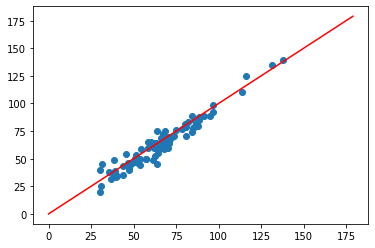

In [23]:
plt.scatter(y_pred, y_test)
plt.plot(np.arange(0,180),np.arange(0,180), c='r')

## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell. You will explain your selection during the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | .84 | 5.63 |-|
| Model 2. | .86 | 6.48 |'state'|
| Model 3. | .92 | 4.94 |'state','summit_elev'|

Model Selection: Model 3